<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# 1. Importing Packages

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
nltk.download('vader_lexicon')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAURYN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAURYN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LAURYN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAURYN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAURYN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LAURYN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 2. Loading Data

In [5]:
df_test = pd.read_csv ("test_with_no_labels.csv")
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [6]:
df_train = pd.read_csv('train.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# 3. Exploratory Data Analysis

In [7]:
df_test.describe()


,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [8]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


*Null values*

In [9]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [10]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [11]:
df_test.shape

(10546, 2)

In [12]:
df_train.shape

(15819, 3)

# 4.Data Cleaning

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


**Comments**

- There are no null values from the observations

In [15]:
unique_sentiment = list(df_train["sentiment"].unique())
print(unique_sentiment)

[1, 2, 0, -1]


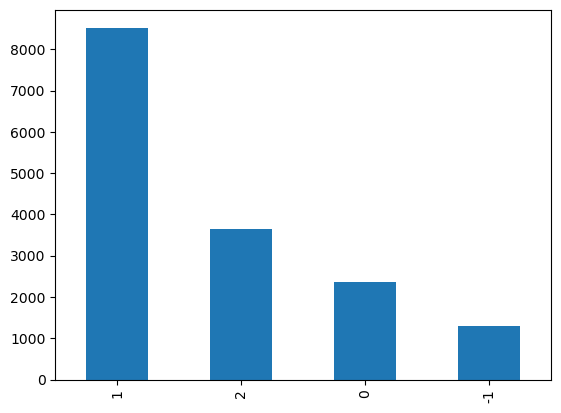

In [16]:
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

# Removing Noise

In [ ]:
 is a key part of getting the data into a usable format.

#### Removing the web-urls

In [17]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [26]:
df_train['message'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: message, dtype: object

#### Converting every word to lower case

In [27]:
df_train['message'] = df_train['message'].str.lower()
df_train['message'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: message, dtype: object

#### Removing punctuation

In [28]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [29]:
df_train['message'] = df_train['message'].apply(remove_punctuation)
df_train['message'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: message, dtype: object

#### Tokenisation

In [30]:
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['message'].apply(tokeniser.tokenize)
df_train['tokens'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [its, not, like, we, lack, evidence, of, anthr...
2    [rt, rawstory, researchers, say, we, have, thr...
3    [todayinmaker, wired, 2016, was, a, pivotal, y...
4    [rt, soynoviodetodas, its, 2016, and, a, racis...
Name: tokens, dtype: object

#### Stemming

In [31]:
stemmer = SnowballStemmer('english')

In [32]:
def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [33]:
df_train['stem'] = df_train['tokens'].apply(mbti_stemmer, args=(stemmer, ))
df_train['stem'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [it, not, like, we, lack, evid, of, anthropoge...
2    [rt, rawstori, research, say, we, have, three,...
3    [todayinmak, wire, 2016, was, a, pivot, year, ...
4    [rt, soynoviodetoda, it, 2016, and, a, racist,...
Name: stem, dtype: object

#### Lemmatization

In [34]:
lemmatizer = WordNetLemmatizer()

In [35]:
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [78]:
df_train['lemma'] = df_train['tokens'].apply(mbti_lemma, args=(lemmatizer, ))
df_train['lemma'].tail(50)

15769    [and, it, gon, na, keep, happening, for, clima...
15770    [the, worst, thing, about, global, warming, is...
15771    [rt, thistallawkgirl, there, no, real, evidenc...
15772    [google, earth’s, timelapse, update, illustrat...
15773    [rt, kelseyistrash, rt, if, you, believe, in, ...
15774    [rt, ajplus, is, this, deal, to, fight, climat...
15775    [rt, clintonfdn, along, with, our, partner, an...
15776    [rt, hanniejene, how, doe, one, not, believe, ...
15777    [builderbob90, blacktencommand, mikepence, als...
15778    [rt, cnnpolitics, why, climate, change, expert...
15779    [rt, gerwinhop, politician, discussing, global...
15780    [just, had, one, of, strange, terrifying, reve...
15781    [rt, stephenschlegel, shes, thinking, about, h...
15782    [rt, forestplots, still, time, to, apply, scho...
15783    [want, to, stop, climate, change, uwm, see, be...
15784    [rt, bjornlomborg, it, is, foolish, 4, world, ...
15785    [rt, jennymarienau, we, should, be, very, conc.

### Object Standardization

In [43]:
lookup_dict = {'rt':'Retweet', 'dm':'direct message', "awsm" : "awesome", "luv" :"love"}

In [45]:
def _lookup_words(input_text):
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word) 
        new_text = " ".join(new_words) 
        return new_text

In [61]:

_lookup_words(df_train['message'].iloc[2002])

'Retweet'

#### Stop words

In [47]:
from nltk.corpus import stopwords
print(sorted(stopwords.words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [48]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [49]:
df_train['stem'] = df_train['tokens'].apply(remove_stop_words)
df_train['stem'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, 2016, pivotal, year, war...
4    [rt, soynoviodetodas, 2016, racist, sexist, cl...
Name: stem, dtype: object

# Feature extraction from text data

#### Bag of word

In [32]:
type_labels = list(df_train.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


In [62]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [67]:
personality = {}
for pp in type_labels:
    df = df_train.groupby('sentiment')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])       

In [71]:
all_words = set()
for pp in unique_sentiment:
    for word in personality[pp]:
        all_words.add(word)

In [72]:
personality['all'] = {}
for pp in type_labels:    
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]

In [73]:
total_words = sum([v for v in personality['all'].values()])
total_words

278214

Text(0.5, 0, 'word frequency')

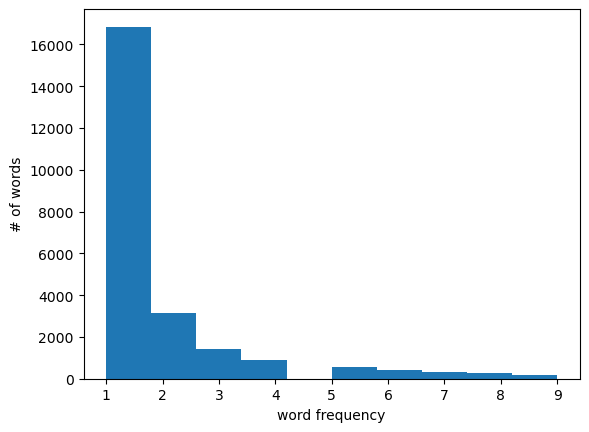

In [40]:
_ = plt.hist([v for v in personality['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [41]:
len([v for v in personality['all'].values() if v == 1])

16846

In [49]:
rare_words = [k for k, v in personality['all'].items() if v==1] 
print(rare_words[:100])

['edu', 'jimtolbertnc', 'repercussions', 'biancajagger', 'intel', 'geothermal', 'renewables…', 'sajak', 'wreak—sooner', 'forachelp', 'techtoday', 'bolstered', 'dip', 'hdrarchitecture', 'supremacists', 'priyasometimes', 'meter', 'tak…', 'amalfi', 'theyz', 'realã°å¸ëœâ´', 'healthandenv', 'deathvalleynps', 'motions', 'demonizing', 'unhabitat…', 'change—which', 'change—you', 'exxonmobi', 'recommit', '17mohdsajid', 'degrade', 'weathet', 'gapol', 'xxl', 'denkyuumedia', 'swelling', 'anyways', 'patternsã¢â‚¬â¦', 'sheepã°å¸â€˜ï†\x8f', 'cossadc', 'lube', 'brilliantly', 'kranzman', 'chums', 'aninews', 'nyes', 'vimtobaba', 'neighbs', 'ohfazfavor', 'mysera26', 'econscitech', 'margaretmuhanga', 'pri', 'jhopkinsbooks', 'aftertheflood', 'amazes', 'followoller', 'happ…', 'markneilg', 'ryanburnett', 'astridpuentes', 'castastrophic', 'spectacular', 'gregthykipp', 'lanf', 'frizzlefelicity', 'inextric…', 'champ', 'frankiecolaross', 'animalamphuman', 'myc…', 'dril…', 'reigning', 'whobdont', 'changeã°å¸â¤â€\

In [74]:
# how many words appear more than 10 times?
print(len([v for v in personality['all'].values() if v >= 10]))
# how many words of the total does that account for?
occurs_more_than_10_times = sum([v for v in personality['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2494
235570


In [75]:
occurs_more_than_10_times/total_words

0.846722307288634

In [47]:
max_count = 10
remaining_word_index = [k for k, v in personality['all'].items() if v > max_count]

### N-grams

In [52]:
from nltk.util import ngrams

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

>>> generate_ngrams('this is a sample text', 2)
# [['this', 'is'], ['is', 'a'], ['a', 'sample'], , ['sample', 'text']]

In [53]:
def word_grams(words, min_n=1, max_n=4):
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [60]:
[x for x in ngrams(df_train.iloc[5000]['tokens'], 4)]

[('rt', 'richarddawkins', 'president', 'trump'),
 ('richarddawkins', 'president', 'trump', 'may'),
 ('president', 'trump', 'may', 'destroy'),
 ('trump', 'may', 'destroy', 'america'),
 ('may', 'destroy', 'america', 'but'),
 ('destroy', 'america', 'but', 'maybe'),
 ('america', 'but', 'maybe', 'we'),
 ('but', 'maybe', 'we', 'can'),
 ('maybe', 'we', 'can', 'stop'),
 ('we', 'can', 'stop', 'him'),
 ('can', 'stop', 'him', 'destroying'),
 ('stop', 'him', 'destroying', 'the'),
 ('him', 'destroying', 'the', 'world'),
 ('destroying', 'the', 'world', 'sign'),
 ('the', 'world', 'sign', 'the'),
 ('world', 'sign', 'the', 'climate'),
 ('sign', 'the', 'climate', 'change'),
 ('the', 'climate', 'change', 'petition'),
 ('climate', 'change', 'petition', 'htã¢â‚¬â¦')]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vect = CountVectorizer()
vect.fit(df_train['message'])

CountVectorizer()

In [20]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [21]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
vect

CountVectorizer(ngram_range=(1, 2))

In [22]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [23]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

In [24]:
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [25]:
betterVect.fit(df_train['message'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

### Term Frequency – Inverse Document Frequency (TF – IDF)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = df_train["message"]
X = obj.fit_transform(corpus)
print (X)

  (0, 13221)	0.32438561793604315
  (0, 22286)	0.1962649589306898
  (0, 22668)	0.07670771273476047
  (0, 22083)	0.07378742983473098
  (0, 22767)	0.18619386825869047
  (0, 22480)	0.3011942460116086
  (0, 1432)	0.12231486548292882
  (0, 22543)	0.11261112230620736
  (0, 8872)	0.10972474471728774
  (0, 15014)	0.10893646323153393
  (0, 3688)	0.23591721604801374
  (0, 12940)	0.3086841727758723
  (0, 10875)	0.10751484945797025
  (0, 6095)	0.27098737266006706
  (0, 3542)	0.23882422831039304
  (0, 21006)	0.21456884101431892
  (0, 6348)	0.17864276067008836
  (0, 4009)	0.244293172610929
  (0, 7232)	0.1932159437466858
  (0, 16234)	0.44727211360691993
  (1, 1588)	0.52094265118164
  (1, 7435)	0.3932716987989639
  (1, 12064)	0.4980168835789958
  (1, 22638)	0.2199002975347319
  (1, 12513)	0.3006792874075582
  :	:
  (15817, 961)	0.3584775254300451
  (15817, 21121)	0.33170980422665547
  (15817, 5103)	0.3100987527608332
  (15817, 12464)	0.26955708032839304
  (15817, 9864)	0.181220288532438
  (15817, 2466)

In [33]:
vectorizer = TfidfVectorizer(min_df=4, max_df=0.8)  # Adjust max_df to a value that makes sense for your data
train_vectors = vectorizer.fit_transform(df_train['your_text_column'])


KeyError: 'your_text_column'

In [30]:
# Apply model on test data 
test_vectors = vectorizer.transform(df_train)

NotFittedError: Vocabulary not fitted or provided

# 5. Modelling

# 6. Model Perfomance

# 7. Model Explanation